**Deep Learning model for Breast Cancer Dataset and Hyperparameter training**

In [ ]:
pip install -U keras-tuner

In [ ]:
import pandas as pd
import numpy as np
import  tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import kerastuner as kt


In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

In [ ]:
df.drop(columns=['id'],inplace=True)

In [ ]:
y=df.iloc[:,0]


In [ ]:
X=df.iloc[:,1:]

In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
y_test.shape

(114,)

In [ ]:


label_encoder=LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.transform(y_test)


In [ ]:
model=Sequential()
model.add(Dense(128,input_dim=30,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(56,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss="binary_crossentropy",optimizer=adam, metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history=model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5836 - loss: 30.5187 - val_accuracy: 0.3626 - val_loss: 16.6533
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4741 - loss: 8.4223 - val_accuracy: 0.6813 - val_loss: 3.2929
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6644 - loss: 1.3999 - val_accuracy: 0.8681 - val_loss: 0.3624
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9149 - loss: 0.3254 - val_accuracy: 0.8571 - val_loss: 0.5995
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9029 - loss: 0.3407 - val_accuracy: 0.9011 - val_loss: 0.2813
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8600 - loss: 0.3197 - val_accuracy: 0.8352 - val_loss: 0.4344
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8865 - loss: 0.2376 - val_accuracy: 0.8791 - val_loss: 0.2798
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9046 - loss: 0.2231 - val_accuracy: 

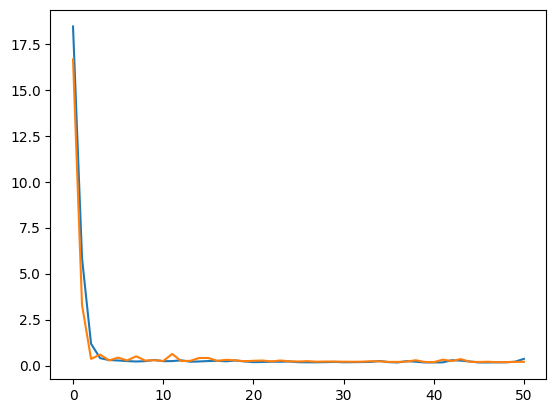

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

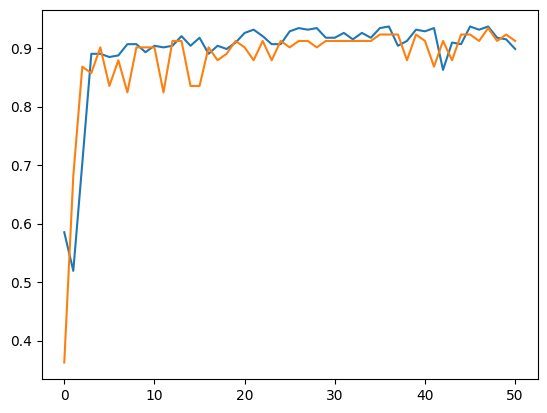

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**Tuning Optimizers**

In [ ]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(128,input_dim=30,activation="relu"))
  model.add(Dense(128,activation="relu"))
  model.add(Dense(56,activation="relu"))
  model.add(Dense(1,activation="sigmoid"))
  optimizer=hp.Choice('optimizer',['adam','rmsprop','sgd','adadelta'])
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory='mydir',project_name="breast cancer")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_train.shape)
print("y_train",y_train.shape)
print("y_train",X_test.shape)
print("y_train",y_test.shape)

(455, 30)
y_train (455,)
y_train (114, 30)
y_train (114,)


In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test) )

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 111,
 'activation0': 'relu',
 'dropout0': 0.1,
 'units1': 105,
 'activation1': 'tanh',
 'dropout1': 0.2,
 'units2': 120,
 'activation2': 'relu',
 'dropout2': 0.4,
 'units3': 37,
 'activation3': 'tanh',
 'dropout3': 0.5,
 'units4': 93,
 'activation4': 'tanh',
 'dropout4': 0.2,
 'units5': 69,
 'activation5': 'tanh',
 'dropout5': 0.5,
 'units6': 116,
 'activation6': 'tanh',
 'dropout6': 0.5,
 'units7': 110,
 'activation7': 'relu',
 'dropout7': 0.1}

**Tuning layers,nodes and activation function**

In [ ]:
def build_model(hp):
  model=Sequential()

  counter=0
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    if counter==0:
      model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128),activation=hp.Choice('activation'+str(i),values=['sigmoid','tanh','relu']),input_dim=30))
      model.add(Dropout(hp.Choice('dropout'+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5])))

    else:
      model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128),activation=hp.Choice('activation'+str(i),values=['sigmoid','tanh','relu'])))
      model.add(Dropout(hp.Choice('dropout'+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5])))


    counter+=1
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model


In [ ]:

tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory='mydir',project_name="model10")

Reloading Tuner from mydir/model10/tuner0.json


In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 111,
 'activation0': 'relu',
 'dropout0': 0.1,
 'units1': 105,
 'activation1': 'tanh',
 'dropout1': 0.2,
 'units2': 120,
 'activation2': 'relu',
 'dropout2': 0.4,
 'units3': 37,
 'activation3': 'tanh',
 'dropout3': 0.5,
 'units4': 93,
 'activation4': 'tanh',
 'dropout4': 0.2,
 'units5': 69,
 'activation5': 'tanh',
 'dropout5': 0.5,
 'units6': 116,
 'activation6': 'tanh',
 'dropout6': 0.5,
 'units7': 110,
 'activation7': 'relu',
 'dropout7': 0.1}

In [ ]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 111)                 │           3,441 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 105)                 │          11,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 105)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │          12,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,042 (109.54 KB)

 Trainable params: 28,042 (109.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6805 - loss: 0.5964 - val_accuracy: 0.8947 - val_loss: 0.5106
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7080 - loss: 0.5961 - val_accuracy: 0.8421 - val_loss: 0.4562
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7178 - loss: 0.5787 - val_accuracy: 0.8421 - val_loss: 0.3824
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7372 - loss: 0.5299 - val_accuracy: 0.8596 - val_loss: 0.4412
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7157 - loss: 0.5916 - val_accuracy: 0.9211 - val_loss: 0.4437
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7280 - loss: 0.5521 - val_accuracy: 0.9211 - val_loss: 0.3729
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7639 - loss: 0.5335 - val_accuracy: 0.9386 - val_loss: 0.3184
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7753 - loss: 0.4932 - val_accuracy: 0.8947

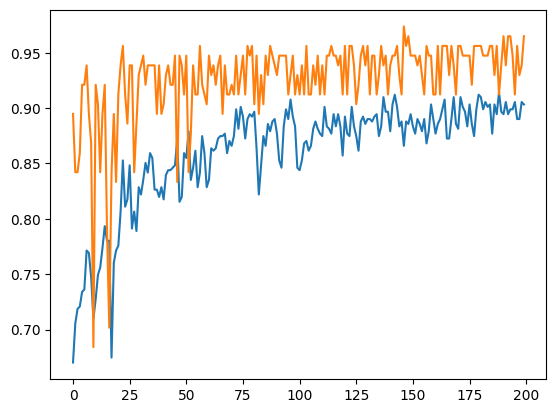

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

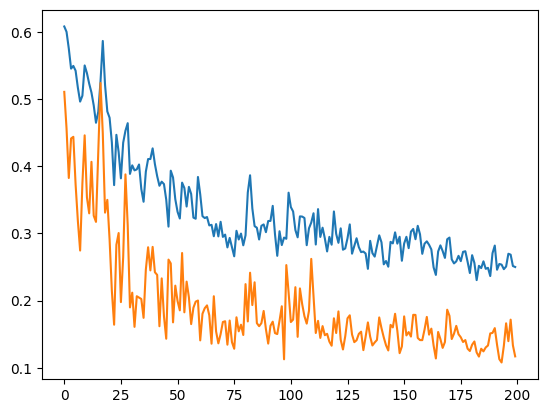

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])